In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mcmodels.core import Mask
import os
import allensdk.core.json_utilities as ju
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from mcmodels.core import VoxelModelCache

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# #load data
# #there appears to be an issue with index_col = [0],  header=[0,1]
# wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/connectivities/ELLeafsmoothsummarysurface_leafsource_summarytarget_v3/elsummarymodel_leafsource_summarytarget_wt_v3.csv',  header=[0,1])

# def fix_pdcsv(csv):
    
#     #wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
#     csv_rownames = np.asarray(csv.iloc[:,0])
#     csv = csv.iloc[:,1:]
#     csv.index = csv_rownames
#     return(csv)

# wt_conn = fix_pdcsv(wt_conn)

In [3]:
#load data
#there appears to be an issue with index_col = [0],  header=[0,1]
#wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/connectivities/ELLeafsmoothsummarysurface_leafsource_summarytarget_v3/elsummarymodel_leafsource_summarytarget_wt_v3.csv',  header=[0,1])
#wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/connectivities/elsummarymodel_leafsource_summarytarget_wt_v3_fixnorm0218.csv',  header=[0,1])
wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/connectivities/elsummarymodel_leafsource_summarytarget_wt_v3_0310_l1norm.csv',  header=[0,1])

def fix_pdcsv(csv):
    
    #wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
    csv_rownames = np.asarray(csv.iloc[:,0])
    csv = csv.iloc[:,1:]
    csv.index = csv_rownames
    return(csv)

wt_conn = fix_pdcsv(wt_conn)

In [4]:
wt_conn.sum(axis = 1)

TMv     0.0
ICc     1.0
ICd     1.0
ICe     1.0
PSV     0.0
       ... 
VeCB    0.0
SCO     0.0
PDTg    0.0
Pa4     0.0
PN      0.0
Length: 564, dtype: float64

In [5]:
#xticknames = wt_conn.columns.get_level_values('second')
major_structures = ['CB',
 'CTXsp',
 'HPF',
 'HY',
 'Isocortex',
 'MB',
 'MY',
 'OLF',
 'P',
 'PAL',
 'STR',
 'TH']
#major_ontoloogy_summary = np.load('/Users/samsonkoelle/ontological_order_summary_majors_names.npy')

In [6]:


#load data
#there appears to be an issue with index_col = [0],  header=[0,1]
dists = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/getinfo/distances.csv',  header=[0,1])

def fix_pdcsv(csv):
    
    #wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
    csv_rownames = np.asarray(csv.iloc[:,0])
    csv = csv.iloc[:,1:]
    csv.index = csv_rownames
    return(csv)

def fill_df_na(data, indices):
    
    for i in range(indices.shape[0]):
        data.iloc[indices[i,0],indices[i,1]] = np.nan
        
    return(data)

dists = fix_pdcsv(dists)

In [7]:
wt_conn = wt_conn.loc[dists.index]
wt_conn = wt_conn.loc[:,dists.columns]

In [8]:
wt_conn.sum(axis = 1)

FRP1      0.0
FRP2/3    1.0
FRP5      1.0
FRP6a     1.0
FRP6b     0.0
         ... 
FL        0.0
FN        1.0
IP        1.0
DN        0.0
VeCB      0.0
Length: 564, dtype: float64

In [9]:
#data = np.asarray(fill_df_na(wt_conn, low_values))
#rss= np.nansum(wt_conn, axis = 1)
#ids = np.where(rss > 0.)[0]

In [10]:
nonzero_ind = np.where(np.sum(wt_conn, axis = 1) > 0)[0]
wt_conn_nonzero = wt_conn.iloc[nonzero_ind]
wt_conn_nonzero_log = np.log(wt_conn_nonzero)
wt_conn_nonzero_log.iloc[np.where(np.isinf(wt_conn_nonzero_log))] = -6

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# cs_col_ipsi = sns.color_palette("Spectral", 12)
# cs_col_contra = sns.color_palette("Spectral", 12)



# alphad_ipsi_majors = np.hstack([np.asarray(cs_col_contra), np.expand_dims(np.ones(12),1)])
# alphad_contra_majors = np.hstack([np.asarray(cs_col_contra), .02*np.expand_dims(np.ones(12),1)])

# cs_col_ipsi = alphad_ipsi_majors
# cs_col_contra = alphad_contra_majors

# cs_col_ipsi_dict = {}
# cs_col_contra_dict = {}
# for i in range(12):
#     cs_col_ipsi_dict[major_structures[i]] = cs_col_ipsi[i]
#     cs_col_contra_dict[major_structures[i]] = cs_col_contra[i]

# ccol = np.zeros((577,4), dtype  =float)

# for i in range(291):
#     ccol[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_summary[i]])
    
# for i in range(286):
#     ccol[i+ 291] = np.asarray(cs_col_contra_dict[major_ontoloogy_summary[:286][i]])
    

In [17]:
# cs_col_ipsi = sns.color_palette("Spectral", 12)
# cs_col_contra = sns.color_palette("Spectral", 12)



# alphad_ipsi_majors = np.hstack([np.asarray(cs_col_contra), np.expand_dims(np.ones(12),1)])
# alphad_contra_majors = np.hstack([np.asarray(cs_col_contra), .02*np.expand_dims(np.ones(12),1)])

# cs_col_ipsi = alphad_ipsi_majors
# cs_col_contra = alphad_contra_majors

# cs_col_ipsi_dict = {}
# cs_col_contra_dict = {}
# for i in range(12):
#     cs_col_ipsi_dict[major_structures[i]] = cs_col_ipsi[i]
#     cs_col_contra_dict[major_structures[i]] = cs_col_contra[i]

# ccol = np.zeros((577,4), dtype  =float)

# for i in range(291):
#     ccol[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_summary[i]])
    
# for i in range(286):
#     ccol[i+ 291] = np.asarray(cs_col_contra_dict[major_ontoloogy_summary[:286][i]])
    

In [18]:
# major_ontoloogy = np.load('/Users/samsonkoelle/ontological_order_leaves_majors_names.npy')
# major_ontoloogy_nonzero = np.asarray(major_ontoloogy)[nonzero_ind]

In [19]:
#np.save('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/getinfo/ontological_order_summary_majors_names_v3', ontological_order_summary_majors_names)
oos_ic_majors = np.load('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/getinfo/oos_ic_majors_v3.npy')
ool_ic_majors = np.load('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/analyses/paper/getinfo/ool_majors_names_v3.npy')

In [20]:
# nsource = wt_conn_nonzero_log.shape[0]
# ntarg = wt_conn_nonzero_log.shape[1]

# cs_col_ipsi = sns.color_palette("Spectral", 12)
# cs_col_contra = sns.color_palette("Spectral", 12)

# alphad_ipsi_majors = np.hstack([np.asarray(cs_col_contra), np.expand_dims(np.ones(12),1)])
# alphad_contra_majors = np.hstack([np.asarray(cs_col_contra), .02*np.expand_dims(np.ones(12),1)])

# cs_col_ipsi = alphad_ipsi_majors
# cs_col_contra = alphad_contra_majors

# cs_col_ipsi_dict = {}
# cs_col_contra_dict = {}
# for i in range(12):
#     cs_col_ipsi_dict[major_structures[i]] = cs_col_ipsi[i]
#     cs_col_contra_dict[major_structures[i]] = cs_col_contra[i]

# ccol = np.zeros((ntarg,4), dtype  =float)

# for i in range(ntarg):
#     ccol[i,:] = np.asarray(cs_col_ipsi_dict[oos_ic_majors[i]])

In [21]:
# crow = np.zeros((nsource,4), dtype  =float)

# for i in range(nsource):
#     crow[i,:] = np.asarray(cs_col_ipsi_dict[ool_ic_majors[nonzero_ind][i]])
    


In [22]:

def get_colors(structures, palettes, alpha):
    
    strs_unique = np.unique(structures)
    nstr = len(strs_unique)
    cs = sns.color_palette("Spectral", nstr)
    
    #print(np.asarray(cs).shape, np.expand_dims(np.ones(12),1).shape)
    cs_alphas = np.hstack([np.asarray(cs), alpha*np.expand_dims(np.ones(12),1)])
    color_str = {}
    for i in range(nstr):
        #print(i)
        color_str[strs_unique[i]] = cs_alphas[i]
    #print(color_str['CB'])
    #print(color_str)
    output = np.zeros((len(structures),4), dtype  =float)
    for i in range(len(structures)):
        #print(np.asarray(color_str[structures[i]]))
        output[i] = np.asarray(color_str[structures[i]])
        
    return(output,color_str)

In [23]:
ccol,ccol_dict = get_colors(np.asarray(oos_ic_majors), sns.color_palette("Spectral", 12), 1.)
crow,crow_dict = get_colors(np.asarray(ool_ic_majors), sns.color_palette("Spectral", 12), 1.)
crow = crow[nonzero_ind]

In [24]:
import matplotlib.pyplot as mpl
import matplotlib

In [25]:
from matplotlib.pyplot import gcf
import matplotlib.patches as mpatches
import seaborn as sns



In [26]:
# g= sns.clustermap(wt_conn_nonzero, col_cluster = False, row_cluster = False, col_colors=ccol, 
#                   row_colors = crow, figsize = (15,15), cmap = 'viridis')
# g.ax_heatmap.set_xticks([])
# g.ax_heatmap.set_yticks([])
# g.ax_heatmap.set_yticklabels([])
# g.ax_heatmap.set_xticklabels([])
# g.ax_heatmap.set_xlabel('Summary Structure Targets (n = 621)', fontsize = 30)
# g.ax_heatmap.set_ylabel('Leaf Sources (n = 564)', fontsize = 30)
# #g.set_title('Source-target distances', fontsize = 40)
# ax = gcf().add_axes((0.6,1.,0.,0.))
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# for label in np.asarray(major_structures)[reo]:
#     ax.bar(0, 0, color=cs_col_ipsi_dict[label], label=label, linewidth=0.)
# l4 = ax.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.14, .8), bbox_transform=gcf().transFigure, fontsize = 15,title_fontsize=20)    

# g.ax_cbar.set_xlabel('Connection strength', rotation=0, fontsize = 20)
# g.ax_cbar.set_position([1.0,0.4,.1,.1])
# g.ax_cbar.axhline(15, color = 'red', linewidth = 5)
# g.ax_col_colors.text(100.,.8, 'Ipsilateral', fontsize = 30, color  = 'fuchsia')
# g.ax_col_colors.text(400.,.8, 'Contralateral', fontsize = 30, color  = 'purple')
# g.ax_col_colors.axvline(311, color = 'fuchsia', linewidth  = 5)
# g.ax_col_colors.arrow(311,.5,-30,0, color = 'fuchsia', linewidth  = 5,head_width=.5, head_length=10)
# g.ax_col_colors.arrow(314,.5,30,0, color = 'purple', linewidth  = 5,head_width=.5, head_length=10)
# g.ax_col_colors.axvline(314, color = 'purple', linewidth  = 5)
# g.ax_col_colors.set_title('Target', fontsize = 40)
# # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
# #             hspace = 0, wspace = 0)

# #plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/distances_nice.png', pad_inches = 0)

# #plt.savefig('/Users/samsonkoelle/distances.png', bbox_inches = [0,0,1.,1.],
# #    pad_inches = 0)

In [27]:
log_wt_conn_nonzero = np.asarray(np.log10(wt_conn_nonzero))
logthresh = -5
log_wt_conn_nonzero[np.where(log_wt_conn_nonzero < logthresh)] = logthresh

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [28]:
import matplotlib as mpl
from pylab import rcParams

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

reo = [4,7,2,1,10,9,11,3,5,8,6,0]
handles = [mpatches.Patch(color =  ccol_dict[major_structures[i]], label = major_structures[i]) for i in reo]

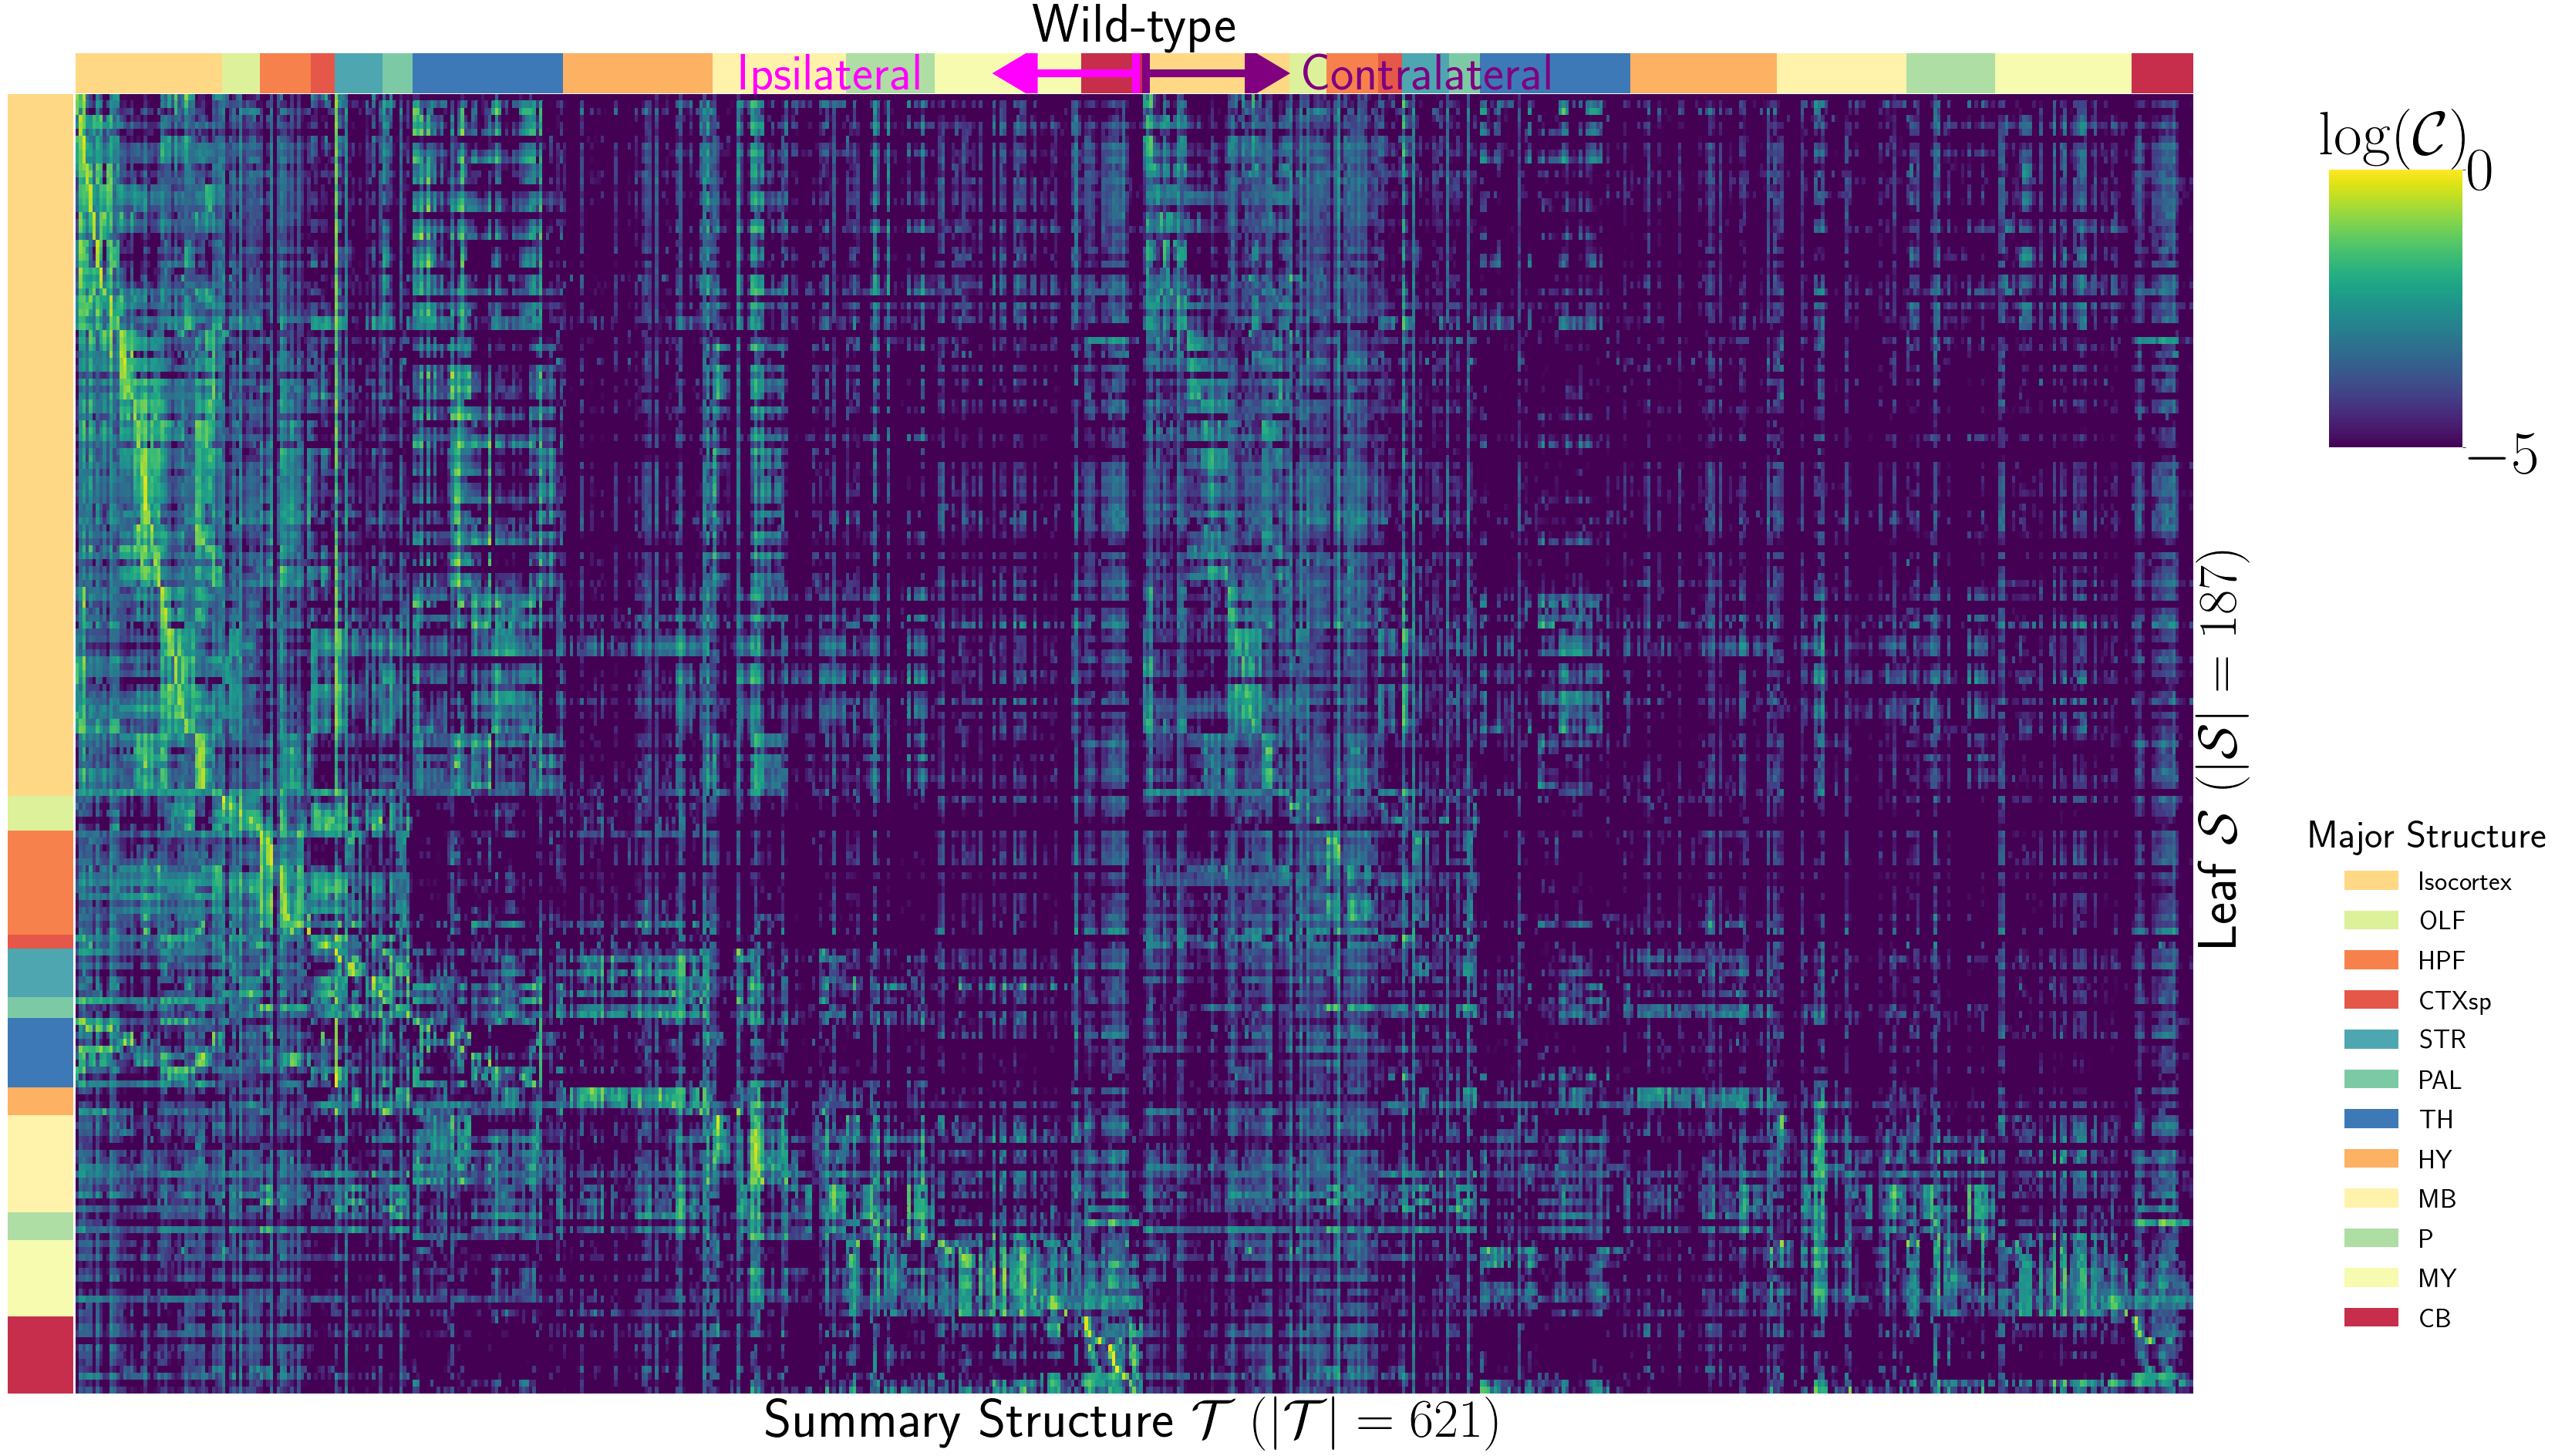

In [30]:
g= sns.clustermap(log_wt_conn_nonzero, col_cluster = False, row_cluster = False, col_colors=ccol, 
                  row_colors = crow, figsize = (40,25), cmap = 'viridis', vmin = -5, vmax = 0.,
                 dendrogram_ratio=(0,0.01),cbar_kws={"ticks":[-5,0]})
#labels = list(g.ax_cbar.get_yticklabels()).copy()#g.ax_cbar.get_yticklabels()
#print(list(labels))
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xlabel('Summary Structure ' + r"$\mathcal T \; (|\mathcal T| = 621)$", fontsize = 70)
g.ax_heatmap.set_ylabel('Leaf ' + r"$\mathcal S \; (|\mathcal S| = 187)$", fontsize = 70)
ax = gcf().add_axes((0.6,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in np.asarray(major_structures)[reo]:
    ax.bar(0, 0, color=ccol_dict[label], label=label, linewidth=0.)
l4 = ax.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.16, .45), bbox_transform=gcf().transFigure, fontsize = 35,title_fontsize=50,frameon=False)    
#l4.axset_xticks([])
#l4.axes.set_yticks([])
#l4.axes.set_axis_off()
#l4.axes.s
#l4.xaxis.set_visible(False)
#l4.yaxis.set_visible(False)
g.ax_cbar.set_title(r"$\log (\mathcal C)$", rotation=0, fontsize = 80)
g.ax_cbar.set_yticklabels(g.ax_cbar.get_yticklabels(), fontsize=80)
g.ax_cbar.set_position([1.05,0.7,.06,.2])
g.ax_col_colors.text(195.,.9, 'Ipsilateral', fontsize = 65, color  = 'fuchsia')
g.ax_col_colors.text(360.,.9, 'Contralateral', fontsize = 65, color  = 'purple')
g.ax_col_colors.axvline(311, color = 'fuchsia', linewidth  = 10)
g.ax_col_colors.arrow(311,.5,-30,0, color = 'fuchsia', linewidth  = 10,head_width=1., head_length=10)
g.ax_col_colors.arrow(314,.5,30,0, color = 'purple', linewidth  = 10,head_width=1., head_length=10)
g.ax_col_colors.axvline(314, color = 'purple', linewidth  = 10)
g.ax_col_colors.set_title('Wild-type', fontsize = 70)

plt.margins(x=0,y=0)
g.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/wt_connectome3', pad_inches = 0,bbox_inches = 'tight')

In [41]:
wt_conn_nonzero.columns[np.sum(wt_conn_nonzero, axis = 0).argsort()]
#10 strongest connections
#10 most dense connections
#10 strongest senders
#10 most dense senders
#10 most dense receivers

MultiIndex([('contra',     'ASO'),
            ('contra',     'SCO'),
            ('contra',      'LT'),
            ('contra',      'PD'),
            ('contra',   'ACVII'),
            (  'ipsi',     'ASO'),
            ('contra',      'DT'),
            ('contra',     'PBG'),
            (  'ipsi',     'PVa'),
            ('contra',     'PST'),
            ...
            (  'ipsi',    'RSPd'),
            (  'ipsi',    'RSPv'),
            (  'ipsi',      'DG'),
            (  'ipsi', 'SSp-bfd'),
            (  'ipsi',     'SCm'),
            (  'ipsi',     'SSs'),
            (  'ipsi',     'MOp'),
            (  'ipsi',     'MOs'),
            (  'ipsi',    'VISp'),
            (  'ipsi',      'CP')],
           length=621)

In [40]:
wt_conn_nonzero.iloc[:,76]

FRP2/3    0.120159
FRP5      0.209775
FRP6a     0.076425
MOp2/3    0.092068
MOp5      0.151908
            ...   
ANcr2     0.000025
PRM       0.000012
PFL       0.003328
FN        0.000162
IP        0.000217
Name: (ipsi, CP), Length: 187, dtype: float64

In [45]:
wt_conn.columns[76][1]

'CP'

In [30]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache


In [50]:
mcc = MouseConnectivityCache(manifest_file = '../connectivity/mouse_connectivity_manifest.json')
st = mcc.get_structure_tree()
ai_map = st.get_id_acronym_map()
ia_map = {value: key for key, value in ai_map.items()}


In [51]:
TOP_DIR = '/Users/samsonkoelle/alleninstitute/mcm_2020/mcm_updated/'
INPUT_JSON = os.path.join(TOP_DIR, 'input_011520.json')
EXPERIMENTS_EXCLUDE_JSON = os.path.join(TOP_DIR, 'experiments_exclude.json')
FILE_DIR = '/Users/samsonkoelle/alleninstitute/mcm_2020/mcm_updated/'
OUTPUT_DIR = os.path.join(FILE_DIR, 'output')

input_data = ju.read(INPUT_JSON)
manifest_file = input_data.get('manifest_file')
manifest_file = os.path.join(TOP_DIR, manifest_file)
experiments_exclude = ju.read(EXPERIMENTS_EXCLUDE_JSON)

#its unclear why the hyperparameters are loaded from the output directory
cache = VoxelModelCache(manifest_file=manifest_file)

In [52]:
mask = Mask.from_cache(cache,structure_ids=[672],hemisphere_id=2)
mask.coordinates.shape[0]

13009

In [54]:
columns = np.asarray(list(wt_conn_nonzero.columns))

In [55]:
shapes = np.zeros(wt_conn_nonzero_log.shape[1])
for i in range(wt_conn_nonzero_log.shape[1]):
    print(i)
    iii = columns[i][1]
    hemi = columns[i][0]
    if hemi == 'ipsi':
        mask = Mask.from_cache(cache,structure_ids=[ai_map[iii]],hemisphere_id=2)
    if hemi == 'contra':
        mask = Mask.from_cache(cache,structure_ids=[ai_map[iii]],hemisphere_id=1)
    shapes[i] = mask.coordinates.shape[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [59]:
densities = wt_conn_nonzero / shapes
log_wt_densities_nonzero = np.asarray(np.log10(densities))
#logthresh = -5
logthresh = -9
log_wt_densities_nonzero[np.where(log_wt_densities_nonzero < logthresh)] = logthresh

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [64]:
log_wt_densities_nonzero.max()

-2.6928512906285142

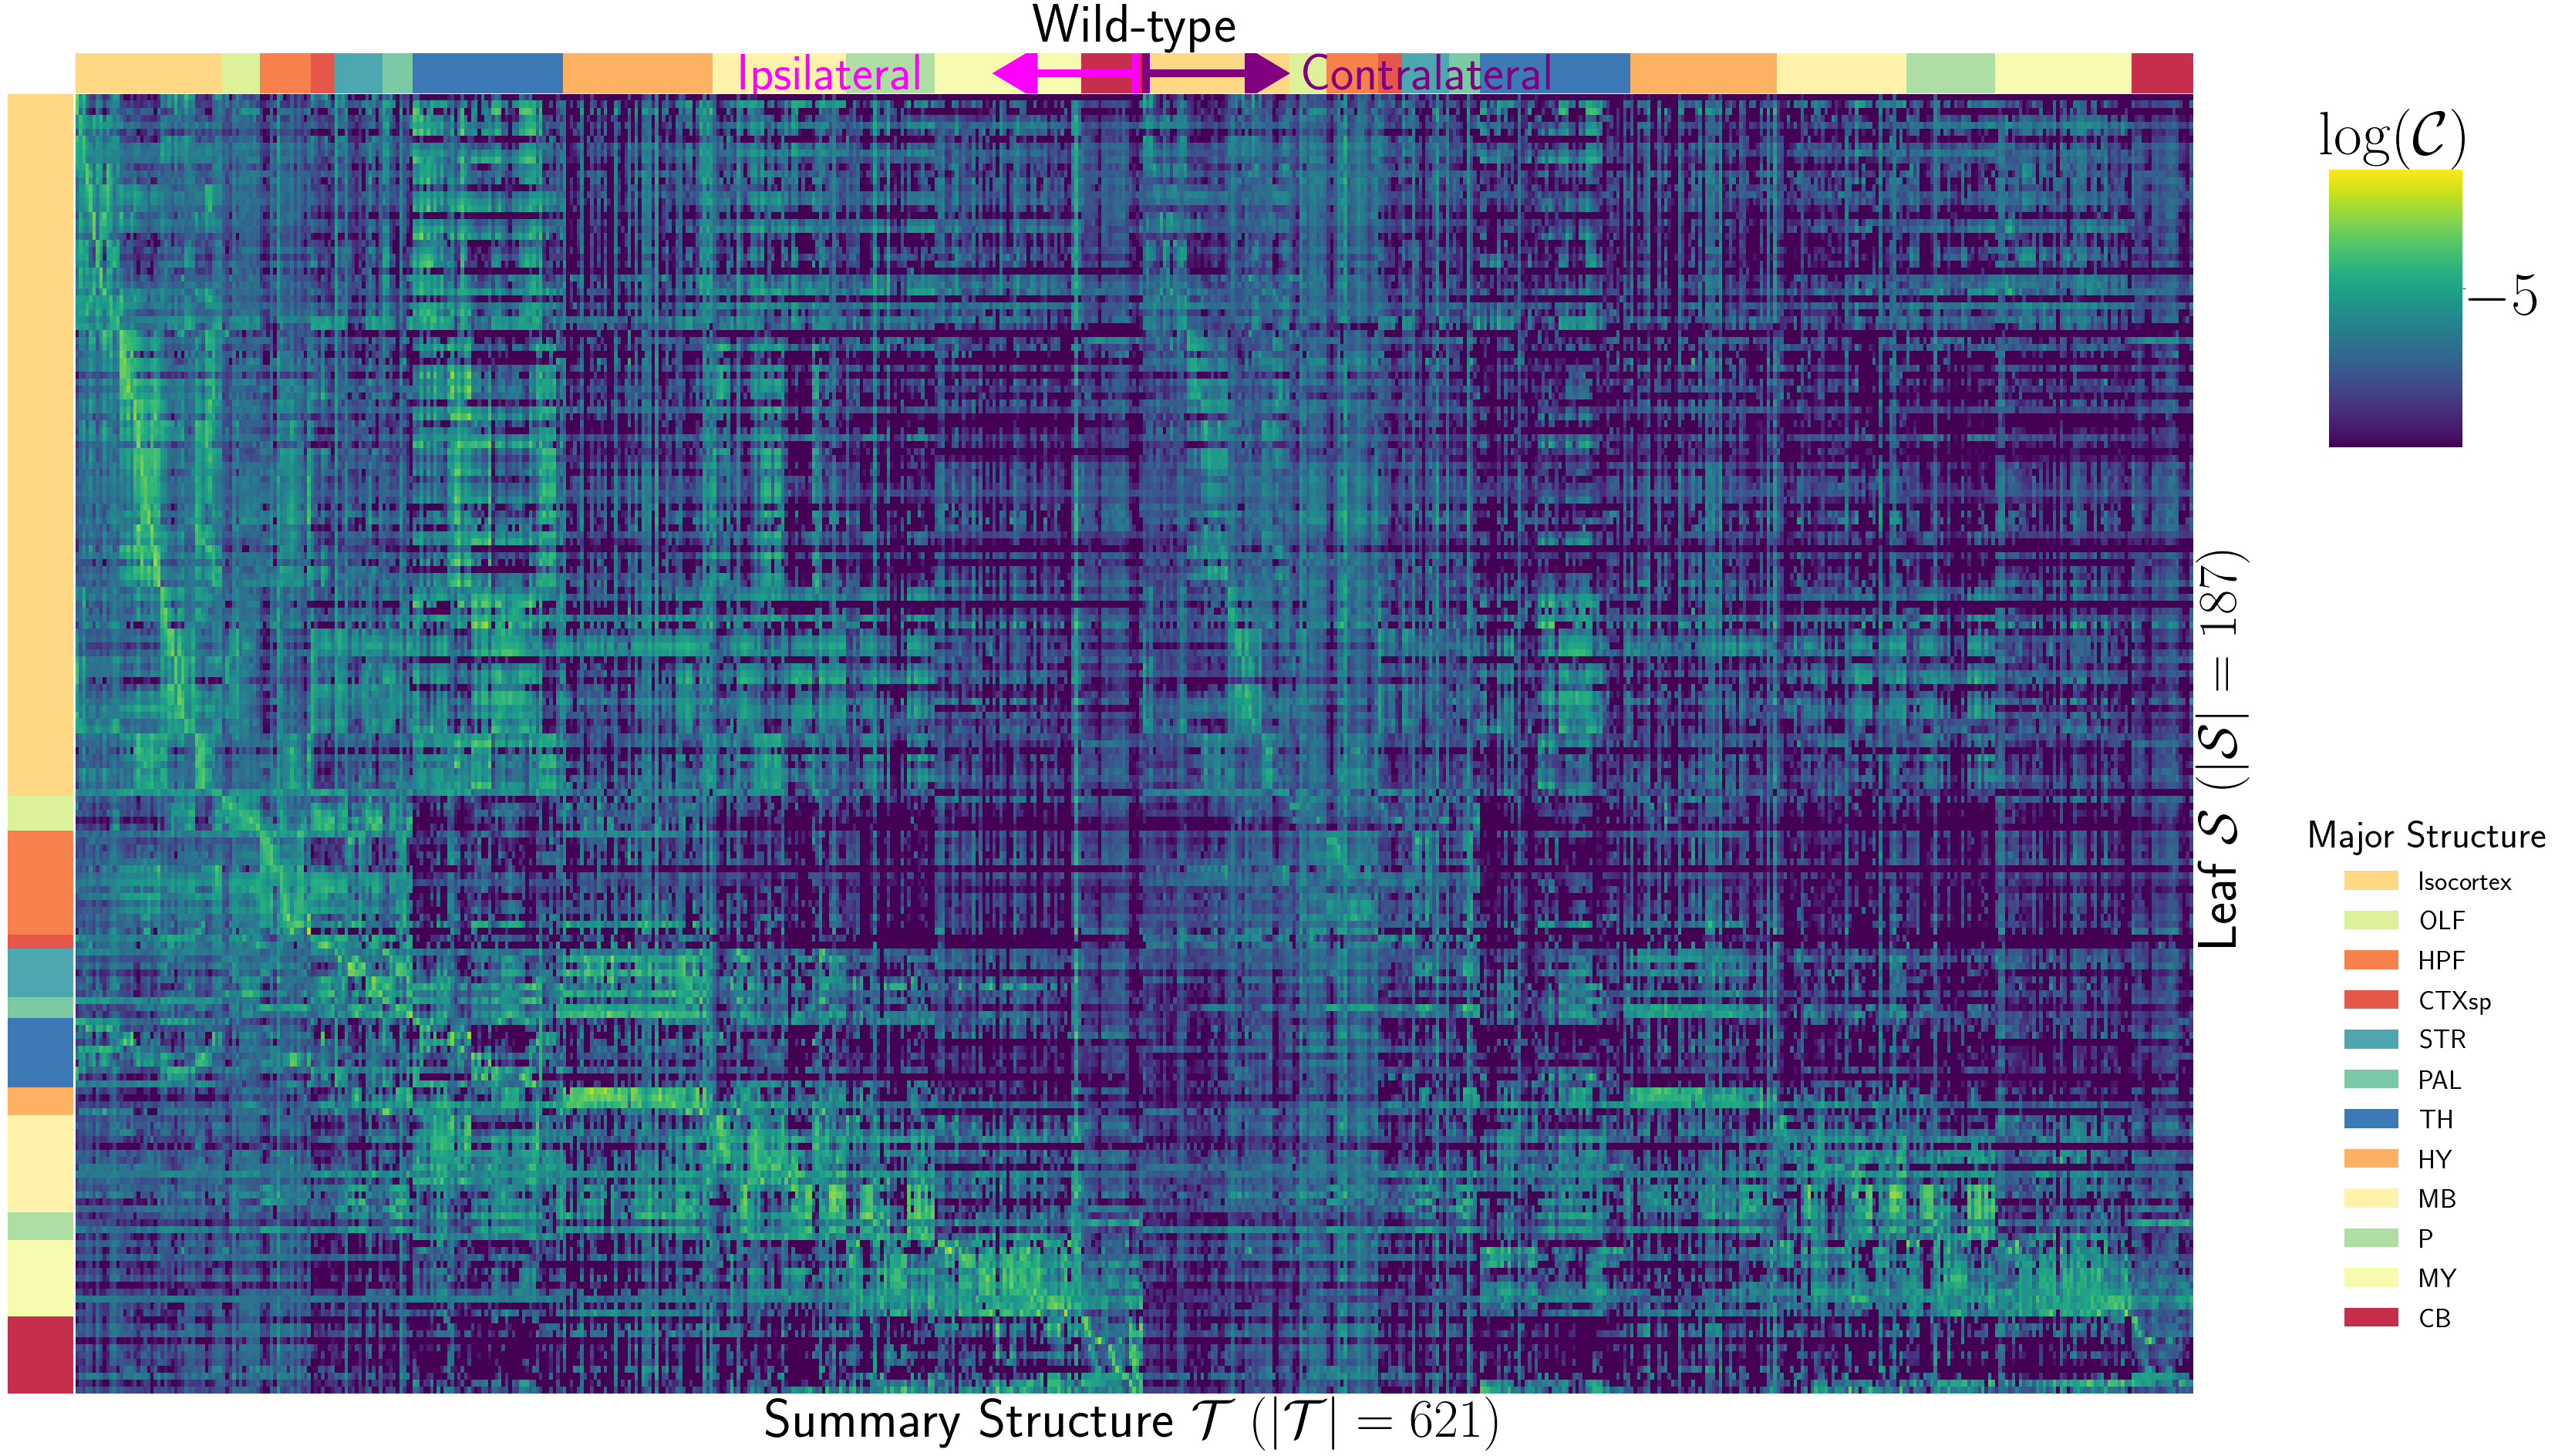

In [65]:
g= sns.clustermap(log_wt_densities_nonzero, col_cluster = False, row_cluster = False, col_colors=ccol, 
                  row_colors = crow, figsize = (40,25), cmap = 'viridis', vmin = -9, vmax = -2,
                 dendrogram_ratio=(0,0.01),cbar_kws={"ticks":[-5,0]})
#labels = list(g.ax_cbar.get_yticklabels()).copy()#g.ax_cbar.get_yticklabels()
#print(list(labels))
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xlabel('Summary Structure ' + r"$\mathcal T \; (|\mathcal T| = 621)$", fontsize = 70)
g.ax_heatmap.set_ylabel('Leaf ' + r"$\mathcal S \; (|\mathcal S| = 187)$", fontsize = 70)
ax = gcf().add_axes((0.6,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in np.asarray(major_structures)[reo]:
    ax.bar(0, 0, color=ccol_dict[label], label=label, linewidth=0.)
l4 = ax.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.16, .45), bbox_transform=gcf().transFigure, fontsize = 35,title_fontsize=50,frameon=False)    
#l4.axset_xticks([])
#l4.axes.set_yticks([])
#l4.axes.set_axis_off()
#l4.axes.s
#l4.xaxis.set_visible(False)
#l4.yaxis.set_visible(False)
g.ax_cbar.set_title(r"$\log (\mathcal C)$", rotation=0, fontsize = 80)
g.ax_cbar.set_yticklabels(g.ax_cbar.get_yticklabels(), fontsize=80)
g.ax_cbar.set_position([1.05,0.7,.06,.2])
g.ax_col_colors.text(195.,.9, 'Ipsilateral', fontsize = 65, color  = 'fuchsia')
g.ax_col_colors.text(360.,.9, 'Contralateral', fontsize = 65, color  = 'purple')
g.ax_col_colors.axvline(311, color = 'fuchsia', linewidth  = 10)
g.ax_col_colors.arrow(311,.5,-30,0, color = 'fuchsia', linewidth  = 10,head_width=1., head_length=10)
g.ax_col_colors.arrow(314,.5,30,0, color = 'purple', linewidth  = 10,head_width=1., head_length=10)
g.ax_col_colors.axvline(314, color = 'purple', linewidth  = 10)
g.ax_col_colors.set_title('Wild-type', fontsize = 70)

plt.margins(x=0,y=0)
#g.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/wt_connectome3', pad_inches = 0,bbox_inches = 'tight')

In [61]:
# shapes = np.zeros(310)
# for i in range(310):
#     print(i)
#     iii = wt_conn.columns[i][1]
#     mask = Mask.from_cache(cache,structure_ids=[ai_map[iii]],hemisphere_id=2)
#     shapes[i] = mask.coordinates.shape[0]

In [82]:
# g= sns.clustermap(log_wt_conn_nonzero, col_cluster = False, row_cluster = False, col_colors=ccol, 
#                   row_colors = crow, figsize = (40,25), cmap = 'viridis', vmin = -6, vmax = 0.)
# g.ax_heatmap.set_xticks([])
# g.ax_heatmap.set_yticks([])
# g.ax_heatmap.set_yticklabels([])
# g.ax_heatmap.set_xticklabels([])
# g.ax_heatmap.set_xlabel('Summary Structure Targets (n = 621)', fontsize = 40)
# g.ax_heatmap.set_ylabel('Leaf Sources (n = 187)', fontsize = 40)
# #g.set_title('Source-target distances', fontsize = 40)
# ax = gcf().add_axes((0.6,1.,0.,0.))
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# for label in np.asarray(major_structures)[reo]:
#     ax.bar(0, 0, color=cs_col_ipsi_dict[label], label=label, linewidth=0.)
# l4 = ax.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.14, .8), bbox_transform=gcf().transFigure, fontsize = 25,title_fontsize=40)    

# g.ax_cbar.set_xlabel('Connection strength', rotation=0, fontsize = 40)
# g.ax_cbar.set_yticklabels(g.ax_cbar.get_yticklabels(), fontsize=25)
# g.ax_cbar.set_position([1.05,0.4,.06,.1])
# g.ax_cbar.axhline(15, color = 'red', linewidth = 5)
# g.ax_col_colors.text(100.,.8, 'Ipsilateral', fontsize = 50, color  = 'fuchsia')
# g.ax_col_colors.text(400.,.8, 'Contralateral', fontsize = 50, color  = 'purple')
# g.ax_col_colors.axvline(311, color = 'fuchsia', linewidth  = 5)
# g.ax_col_colors.arrow(311,.5,-30,0, color = 'fuchsia', linewidth  = 5,head_width=.5, head_length=10)
# g.ax_col_colors.arrow(314,.5,30,0, color = 'purple', linewidth  = 5,head_width=.5, head_length=10)
# g.ax_col_colors.axvline(314, color = 'purple', linewidth  = 5)
# g.ax_col_colors.set_title('Wild-type Connection Strengths', fontsize = 70)

# #g.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/wt_connectome', pad_inches = 0)



Norms proceed as
\begin{eqnarray*}
y_j = \sum w_{ij} y_i
\end{eqnarray*}
Then
\begin{eqnarray*}
\|y_j\| &= \|\sum w_{ij} y_i\|
&= (\sum_t (\sum_i w_{ij} y_{it} ) ^2)^{1/2} \\
&=  (\sum_t (w_{j}^T y_{t} ) ^2)^{1/2}
\end{eqnarray*}



\begin{eqnarray*}
y_j = ( \sum w_{ij} ( y_i^{\odot2} ))^{\odot 1/2}
\end{eqnarray*}
Then
\begin{eqnarray*}
\|y_j\| &=
\|(  \sum_i w_{ij} ( y_i^{\odot2} ))^{\odot 1/2}\| \\
&= (\sum_{t} \sum_i w_{ij} ( y_{it}^{2} )) )^{1/2} \\
&= ( \sum_i w_{ij} \sum_{t}  ( y_{it}^2 )) )^{1/2} \\
&= ( \sum_i w_{ij} \| y_{i}\|^2 )) ^{1/2} \\
&= 1
\end{eqnarray*}

In [38]:
np.where(wt_conn.columns == tuple(['ispi', 'EW']))[0]

array([], dtype=int64)

In [42]:
asdf = np.asarray(list(wt_conn.columns) ).transpose()

In [44]:
np.where(asdf[1] == 'EW')

(array([211]),)

In [54]:
wt_conn.loc['Su3'].iloc[180:220]

ipsi  PSTN    4.421076e-03
      PeF     6.296081e-03
      RCH     7.330466e-04
      STN     9.557963e-03
      TU      1.171974e-02
      ZI      1.478299e-02
      ME      1.032720e-04
      SCs     2.970531e-02
      IC      2.949305e-02
      NB      1.827040e-04
      SAG     4.668636e-04
      PBG     5.457971e-04
      MEV     1.594992e-03
      SCO     6.324901e-06
      SNr     4.982943e-02
      VTA     2.687872e-03
      PN      6.412797e-09
      RR      1.311363e-03
      MRN     1.129446e-01
      SCm     3.242662e-02
      PAG     3.843071e-01
      APN     4.236179e-03
      MPT     3.614473e-04
      NOT     1.448658e-03
      NPC     1.605717e-03
      OP      2.147608e-04
      PPT     3.990872e-04
      CUN     1.705132e-02
      RN      3.421131e-03
      III     1.231697e-04
      MA3     4.878827e-05
      EW      1.297704e-04
      IV      4.377062e-05
      Pa4     9.185378e-04
      VTN     6.318772e-05
      AT      8.065522e-05
      LT      1.404447e-06
 

In [52]:
wt_conn.loc['Su3'].iloc[0:50]

ipsi  FRP        0.026549
      MOp        0.342446
      MOs        0.432918
      SSp-n      0.055110
      SSp-bfd    0.112094
      SSp-ll     0.075927
      SSp-m      0.147104
      SSp-ul     0.089329
      SSp-tr     0.045412
      SSp-un     0.026429
      SSs        0.252535
      GU         0.074943
      VISC       0.067213
      AUDd       0.025025
      AUDp       0.044028
      AUDpo      0.010968
      AUDv       0.054137
      VISal      0.013344
      VISam      0.023018
      VISl       0.020952
      VISp       0.116676
      VISpl      0.009064
      VISpm      0.027004
      VISli      0.008213
      VISpor     0.021748
      ACAd       0.115719
      ACAv       0.061699
      PL         0.136112
      ILA        0.035793
      ORBl       0.078498
      ORBm       0.050709
      ORBvl      0.057450
      AId        0.126076
      AIp        0.055546
      AIv        0.044190
      RSPagl     0.052067
      RSPd       0.074983
      RSPv       0.109642
      VISa  

In [38]:
np.where(log_wt_conn_nonzero[:,0] > -3)[0] #84,133

array([  0,   1,   2,   6,  82,  83,  84, 133, 140])

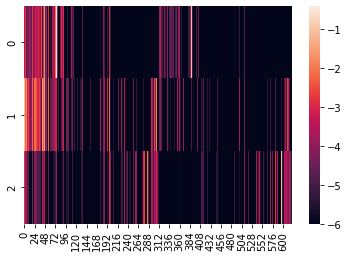

In [75]:
sns.heatmap(log_wt_conn_nonzero[[100, 155,173]]) #100 is big, 155

In [76]:
wt_conn_nonzero.iloc[[100, 155,173]]

ipsi                                                              \
           FRP       MOp       MOs     SSp-n   SSp-bfd    SSp-ll     SSp-m   
ECT5  0.005249  0.034829  0.064339  0.011336  0.057024  0.014849  0.009948   
Su3   0.026549  0.342446  0.432918  0.055110  0.112094  0.075927  0.147104   
MV    0.004149  0.057843  0.064267  0.014208  0.018638  0.014134  0.025092   

                                    ...    contra                      \
        SSp-ul    SSp-tr    SSp-un  ...       SIM        AN       PRM   
ECT5  0.020417  0.012640  0.007620  ...  0.000001  0.000001  0.000003   
Su3   0.089329  0.045412  0.026429  ...  0.071322  0.111234  0.043021   
MV    0.021886  0.006837  0.005892  ...  0.021283  0.042947  0.012079   

                                                                              \
              COPY       PFL            FL            FN        IP        DN   
ECT5  6.363729e-07  0.000005  3.600553e-08  3.999056e-07  0.000000  0.000000   
Su3   7.647363e-03  0.105105  5.326319e-03  2.037372e-04  0.000920  0.000600   
MV    1.167385e-02  0.024289  3.185592e-02  1.400437e-02  0.016003  0.003197   

                
          VeCB  
ECT5  0.000000  
Su3   0.000037  
MV    0.004808  

[3 rows x 621 columns]

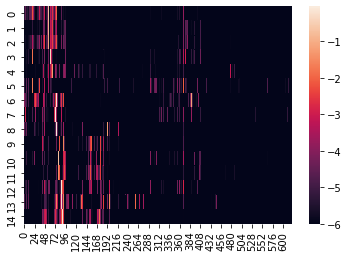

In [48]:
sns.heatmap(log_wt_conn_nonzero[115:130]) #100 is big #129 is big

In [55]:
np.var(log_wt_conn_nonzero , axis  =1).argsort()

array([183, 182, 176, 181, 101, 177, 180, 179,  38, 110,  59, 178, 147,
       108, 109,   6, 142,  25, 148, 123,  37,  55, 141,  26,  62, 151,
       149,  17, 107,  13,  58,  21,  74,   0,  40,  71,  12, 122,  56,
         7,  67, 102,  16,   3, 136,  96,  29, 118, 124, 153,  87,  27,
        70,  20, 134,  22, 146, 112,  54, 120,   8, 125,  18,  81, 127,
        31,  15,  57,  34,  24, 106,  69, 111,  95,  42,  64, 116,   9,
       165,  77,  94,  98, 152, 126,  46,   5,  61,  50, 154,  75,  82,
       103,  11, 156, 140, 137, 135,  10,  23, 119,  99, 167, 139,  52,
         1,  97, 184, 138, 133,   4,  73, 164,  90, 169, 115, 121,  30,
        53, 129, 175,  19,  72, 114,  39,  85, 170,  84, 104,  14,  36,
       130, 150,  44,  68,  65,   2,  83,  60, 174,  47,  43, 117,  66,
       162, 128,  63, 186,  35,  49,  91,  80,  51, 113,  32,  48, 105,
       143, 144,  93,  28, 132,  88,  78,  33,  76, 166,  45,  86, 158,
       172, 171,  92,  89, 131,  41, 168, 145, 185, 173, 161, 15

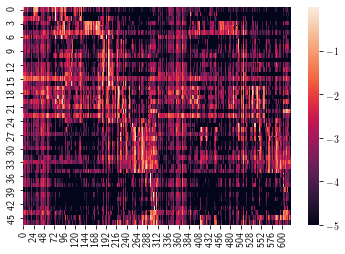

In [83]:
sns.heatmap(log_wt_conn_nonzero[140:190]) #100 is big #129 is big #163 is big

In [46]:
np.where(ool_ic_majors[nonzero_ind] == 'Isocortex')[0].shape

(101,)

In [32]:
crow

array([[0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397, 0.51926182, 1.        ],
       [0.99546328, 0.84767397,

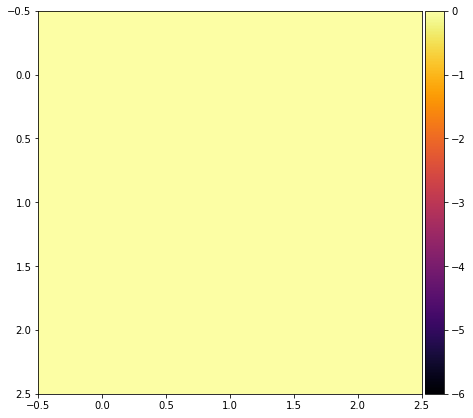

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
m1 = np.random.rand(3, 3)
m2 = np.arange(0, 3*3, 1).reshape((3, 3))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(m1, interpolation='None',cmap = mpl.cm.inferno, vmin = -6, vmax = 0)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
#im1.clim(-6,0)

In [1]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
#cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (100,25),
                   cmap = mpl.cm.inferno,
                    )

#xticklabels = cm.ax_heatmap.get_xticklabels()
#cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
cm.ax_heatmap.tick_params(left=False, bottom=False, right = False, top = False)
cm.ax_heatmap.set_xticklabels([])
cm.ax_heatmap.set_yticklabels([])

# yticklabels = cm.ax_heatmap.get_yticklabels()
# cm.ax_heatmap.set_yticklabels(yticklabels, visible = True, fontsize = 5)

cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.cax.set_visible(False)
cm.gs.update(left=0.05, right=0.45)
cm.ax_heatmap.set_xlabel('')
cm.ax_heatmap.set_ylabel('')
cm.ax_heatmap.tick_params(left=False, bottom=False)

gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
ax2 = cm.fig.add_axes([.48,.2,.03,.3], gs2[0])
cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)
#cm.ax_heatmap.text(2.,2.,'Ipsilateral', fontsize = 55)
cm.ax_col_colors.text(100.,.7, 'Ipsilateral', fontsize = 50)
cm.ax_col_colors.text(400.,.7, 'Contralateral', fontsize = 50)
#cm.ax_col_colors.text(291.,.6, '|', fontsize = 50)
cm.ax_col_colors.text(250.,-.75, 'Target', fontsize = 70)
cm.ax_row_colors.text(-1.,70., 'Source', fontsize = 70, rotation = 90)

cbar = fig.colorbar(im1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Connectivity strength', rotation=0)
cbar.ax.set_xlabel('Log(Connection Strength)', rotation=0, fontsize = 30)
cbar.ax.yaxis.set_ticks_position('left')

#plt.close(2)
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/Figure2')

NameError: name 'sns' is not defined

In [ ]:
g= sns.clustermap(dists, col_cluster = False, row_cluster = False, col_colors=ccol, 
                  row_colors = crow, figsize = (15,15), cmap = 'viridis')
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xlabel('Summary Structure Targets (n = 621)', fontsize = 30)
g.ax_heatmap.set_ylabel('Leaf Sources (n = 564)', fontsize = 30)
#g.set_title('Source-target distances', fontsize = 40)
ax = gcf().add_axes((0.6,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in np.asarray(major_structures)[reo]:
    ax.bar(0, 0, color=cs_col_ipsi_dict[label], label=label, linewidth=0.)
l4 = ax.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.14, .8), bbox_transform=gcf().transFigure, fontsize = 15,title_fontsize=20)    

g.ax_cbar.set_xlabel('Distance ' +  r'$(100 \mu m)$', rotation=0, fontsize = 20)
g.ax_cbar.set_position([1.0,0.4,.1,.1])
g.ax_cbar.axhline(15, color = 'red', linewidth = 5)
g.ax_col_colors.text(100.,.8, 'Ipsilateral', fontsize = 30, color  = 'fuchsia')
g.ax_col_colors.text(400.,.8, 'Contralateral', fontsize = 30, color  = 'purple')
g.ax_col_colors.axvline(311, color = 'fuchsia', linewidth  = 5)
g.ax_col_colors.arrow(311,.5,-30,0, color = 'fuchsia', linewidth  = 5,head_width=.5, head_length=10)
g.ax_col_colors.arrow(314,.5,30,0, color = 'purple', linewidth  = 5,head_width=.5, head_length=10)
g.ax_col_colors.axvline(314, color = 'purple', linewidth  = 5)
g.ax_col_colors.set_title('Distances b/w structures', fontsize = 40)
for i in range(low_values.shape[0]):
    #print(i)
    g.ax_heatmap.add_patch(Rectangle((low_values[i][1],low_values[i][0]), 1, 1, fill=False, edgecolor='red', lw=.15))
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)

plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/distances_nice.png', pad_inches = 0)

#plt.savefig('/Users/samsonkoelle/distances.png', bbox_inches = [0,0,1.,1.],
#    pad_inches = 0)